# Explore here

# **Búsqueda de una posible relación entre los recursos sanitarios y los datos socio demográficos.**

Importación de las librerías necesarias

In [1]:
# Librería para la declaración y uso de Data Frames:
import pandas as pd

# Librería para realizar operaciones matemáticas: 
import numpy as np

# Librería para visualizar datos estadísticos: 
import seaborn as sns

# Librería para trazar gráficos:
import matplotlib.pyplot as plt

# Librería para el escalado de varibles, asegurando mismo rango (0 a 1):
from sklearn.preprocessing import MinMaxScaler

# Librería codificar variables categóricas a numéricas:
from sklearn.preprocessing import LabelEncoder

# Librería para generar un modelo de Regresión Lineal: 
import statsmodels.api as sm

# Librería para poder realizar la partición del conjunto de datos:
from sklearn.model_selection import train_test_split

# Librería para usar el método Z-score y detectar outlaiers:
from scipy.stats import zscore

# Librería para seleccionar características con SelectKBest:
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression

# Librería para poder iniciar el modelo de regresión lineal:
from sklearn.linear_model import LinearRegression

# Librería para calcular error cuadrático y el coeficiente de determinación (evaluación y comparación de modelos de regresión)
from sklearn.metrics import mean_squared_error, r2_score

## **Paso 1. Lectura de datos.**
Lo primero que haremos será leer y guardar en una variable la información para trabajar con ella.

Para ello, se ha guaradado el archivo con todos los datos en la ruta: https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv y se ha cargado en un Data Frame:

In [2]:
# Importamos el archivo e imprimimos las primeras filas del dataframe para tener una visión rápida del conjunto
data = pd.read_csv(r"https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")

# Configuramos para mostrar todas las columnas y hacer más entendible el Dataframe
pd.set_option('display.max_columns', None)

# Se muestran las 5 primeras filas del Data Frame
data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

Generalmente en esta parte se hace una descripción del valor de cada variable, pero viendo que se trata de 108, sería demasiado tedioso, asique filtraremos primeramente las más importantes para describirlas después.

## **Paso 2. Exploración y limpieza de datos.**

### **Paso 2.1 Comprensión de las características.**

In [3]:
# Recurrimos al atributo shape para describir la información que contiene:
print (f" El conjunto de datos cuenta con información de {data.shape[0]} beneficiarios, con un total de {data.shape[1]} datos característicos de cada uno de ellos.")

 El conjunto de datos cuenta con información de 3140 beneficiarios, con un total de 108 datos característicos de cada uno de ellos.


### **Paso 2.2 Identificación de valores duplicados y nulos.** 

In [4]:
# Descripción general del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [5]:
# Identificar las columnas categóricas
categorical_columns = data.select_dtypes(include=['object']).columns

# Convertir a lista y eliminar índice y dtype
categorical_columns = categorical_columns.tolist()
print(f"En este punto sabemos que de las 108 variables, solo 2 son categóricas {categorical_columns} mientras que las 106 restantes son numéricas")

En este punto sabemos que de las 108 variables, solo 2 son categóricas ['COUNTY_NAME', 'STATE_NAME'] mientras que las 106 restantes son numéricas


In [6]:
# Sumar valores nulos por columna
null_columns = data.isnull().sum()

# Mostrar solo las columnas que tienen valores nulos
print(null_columns[null_columns > 0])


Series([], dtype: int64)


No aparecen valores nulos en el Dataframe


In [7]:
# Se utiliza el método .duplicated() para identificar los valores repetidos dentro del DataFrame:
print(f" Hay un total de {data.duplicated().sum()} valores duplicados.")

 Hay un total de 0 valores duplicados.


## **Paso 3. Análisis univariado**

### **Paso3.1 Análisis de variables categóricas.**

/tmp/ipykernel_779/3639344412.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[0], data=data[data['COUNTY_NAME'].isin(top_counties)], x="COUNTY_NAME", order=top_counties, palette="viridis")
/tmp/ipykernel_779/3639344412.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[1], data=data, x="STATE_NAME", order=state_order, palette="coolwarm")


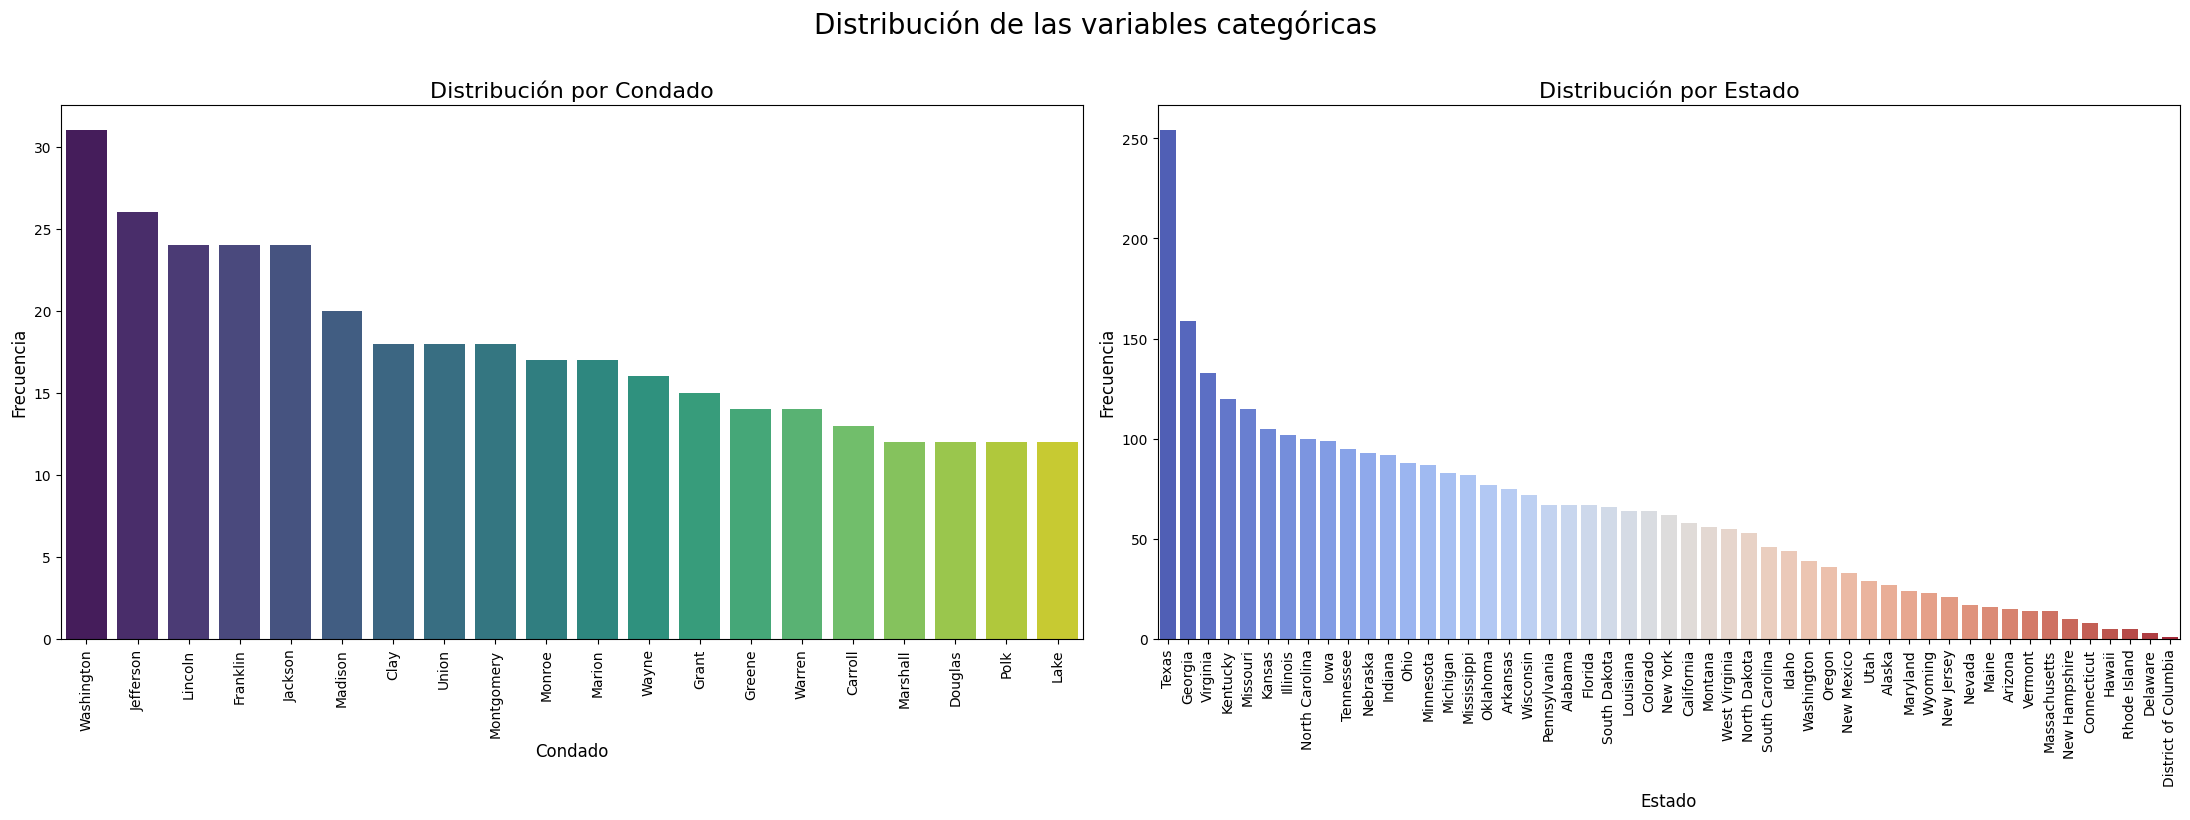

In [8]:
fig, axis = plt.subplots(1, 2, figsize=(22, 8))

# Añadir un título global
fig.suptitle("Distribución de las variables categóricas", fontsize=20, y=1.02)

# Gráfico de COUNTY_NAME (Mostrando solo los 20 más comunes para evitar sobrecarga visual)
top_counties = data['COUNTY_NAME'].value_counts().nlargest(20).index
sns.countplot(ax=axis[0], data=data[data['COUNTY_NAME'].isin(top_counties)], x="COUNTY_NAME", order=top_counties, palette="viridis")
axis[0].set_title("Distribución por Condado", fontsize=16)
axis[0].set_xlabel("Condado", fontsize=12)
axis[0].set_ylabel("Frecuencia", fontsize=12)
axis[0].tick_params(axis='x', rotation=90)

# Gráfico de STATE_NAME (Ordenado por frecuencia)
state_order = data['STATE_NAME'].value_counts().index
sns.countplot(ax=axis[1], data=data, x="STATE_NAME", order=state_order, palette="coolwarm")
axis[1].set_title("Distribución por Estado", fontsize=16)
axis[1].set_xlabel("Estado", fontsize=12)
axis[1].set_ylabel("Frecuencia", fontsize=12)
axis[1].tick_params(axis='x', rotation=90)

# Ajustar márgenes y espaciado
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Espacio para el título global

# Mostrar la gráfica
plt.show()


### **Paso 3.2 Análisis de variables numéricas**

En este punto asumimos que resulta imposible continuar con esta cantidad de variables, debemos reducirlas y para ello nombramos nuestra variable objetivo: **"Heart disease_number"**

In [9]:
# Convertir todas las variables categóricas a numéricas
data_n = pd.get_dummies(data, drop_first=True)

In [10]:
# Dividir el DataFrame en variables independientes X y la variable dependiente y
X = data_n.drop('Heart disease_number', axis=1)
y = data_n['Heart disease_number']

# Aplicar SelectKBest con una función de puntuación, por ejemplo, f_regression
selector = SelectKBest(score_func=f_regression, k=20)
X_new = selector.fit_transform(X, y)

# Obtener los nombres de las columnas seleccionadas
selected_features = X.columns[selector.get_support()]

# Crear un nuevo DataFrame con las características seleccionadas
data_seleccionado = data_n[selected_features]

# Añadir la variable dependiente 'Heart disease_number' al DataFrame, para poder hacer el mapa de calor de correlación
data_seleccionado['Heart disease_number'] = data_n['Heart disease_number']

print("Características seleccionadas:")
print(selected_features)
print("\nNuevo DataFrame con las características seleccionadas:")
print(data_seleccionado.head())

Características seleccionadas:
Index(['TOT_POP', '40-49', '50-59', '60-69', '70-79', '80+', 'White-alone pop',
       'POP_ESTIMATE_2018', 'High school diploma only 2014-18',
       'Some college or associate's degree 2014-18',
       'Civilian_labor_force_2018', 'Employed_2018', 'Total Population',
       'Population Aged 60+', 'county_pop2018_18 and older',
       'anycondition_number', 'Obesity_number', 'COPD_number',
       'diabetes_number', 'CKD_number'],
      dtype='object')

Nuevo DataFrame con las características seleccionadas:
   TOT_POP  40-49  50-59  60-69  70-79   80+  White-alone pop  \
0    55601   7582   7738   5826   4050  2014            42660   
1   218022  27338  29986  29932  20936  9368           190301   
2    24881   3074   3278   3076   2244  1048            12209   
3    22400   3038   3115   2545   1723   785            17211   
4    57840   7474   7844   6965   4931  2335            55456   

   POP_ESTIMATE_2018  High school diploma only 2014-18  \
0      

/tmp/ipykernel_779/1037414202.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_seleccionado['Heart disease_number'] = data_n['Heart disease_number']


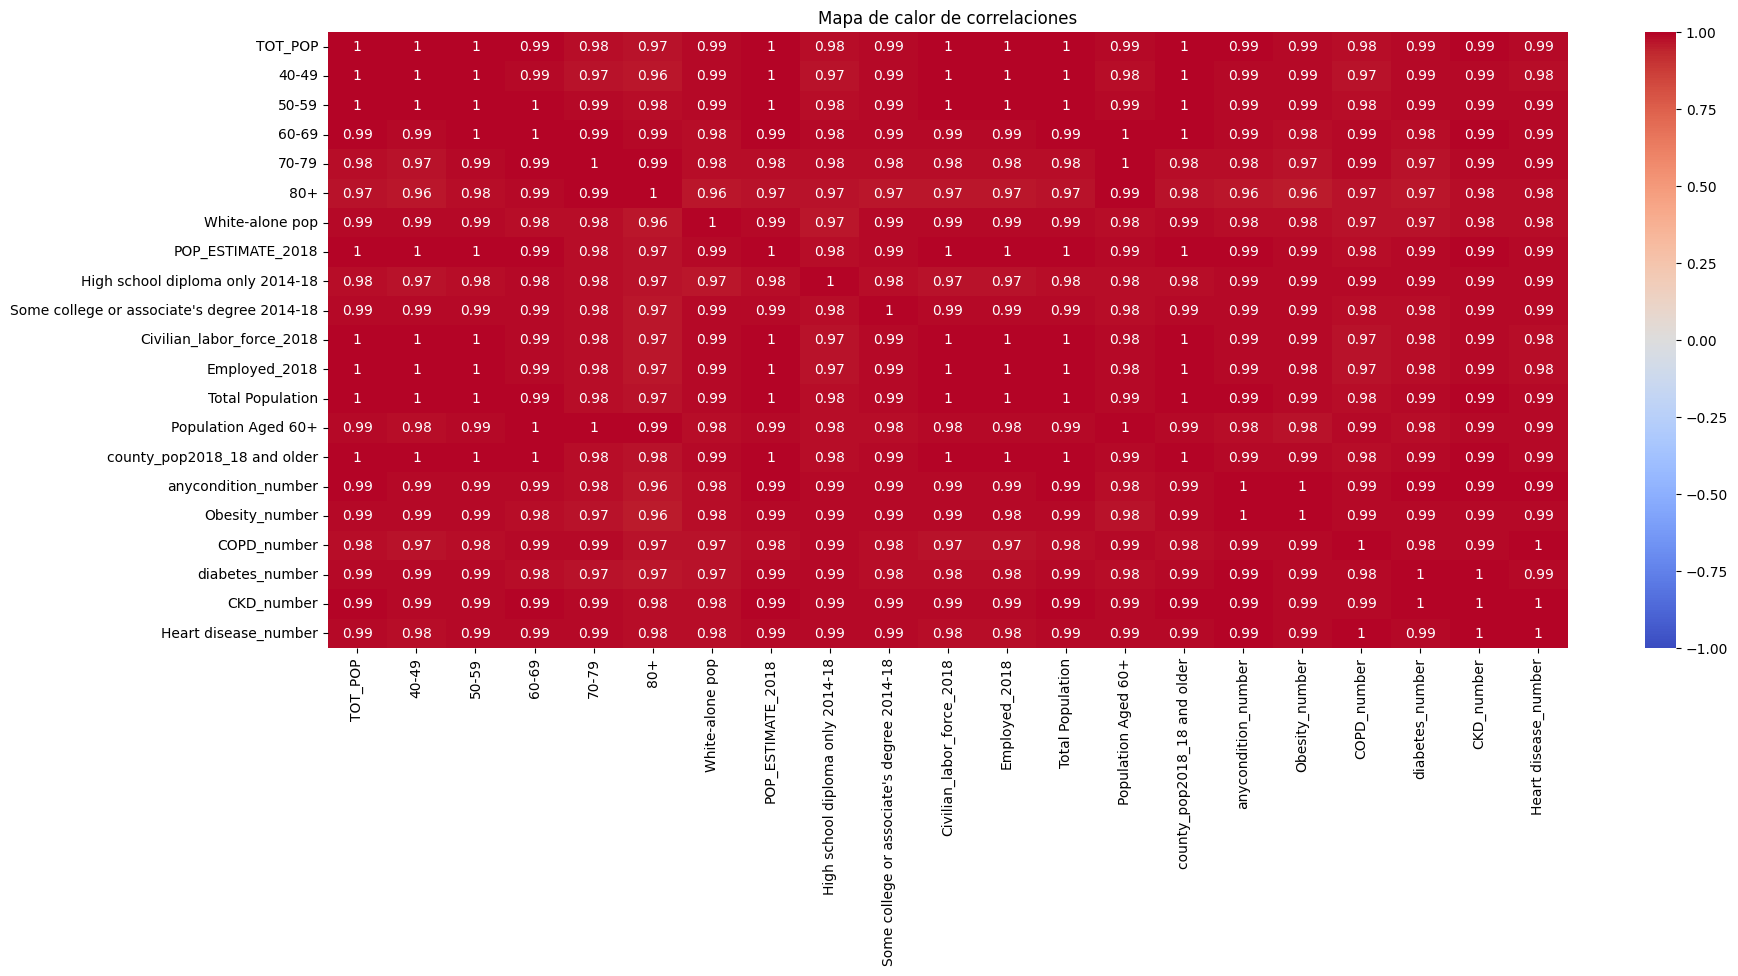

In [ ]:
# Ahora generamos el mapa de calor.
plt.figure(figsize=(20, 8))
sns.heatmap(data_seleccionado.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor de correlaciones')
plt.show()


In [12]:
data = data_seleccionado
data.head()

,TOT_POP,40-49,50-59,60-69,70-79,80+,White-alone pop,POP_ESTIMATE_2018,High school diploma only 2014-18,Some college or associate's degree 2014-18,Civilian_labor_force_2018,Employed_2018,Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number,Heart disease_number
0,55601,7582,7738,5826,4050,2014,42660,55601,12119,10552,25957,25015,55036,10523,42438,20181,15193,3644,5462,1326,3345
1,218022,27338,29986,29932,20936,9368,190301,218022,40579,46025,93849,90456,203360,53519,170912,68790,50761,14692,20520,5479,13414
2,24881,3074,3278,3076,2244,1048,12209,24881,6486,4566,8373,7940,26201,6150,19689,11325,8013,2373,3870,887,2159
3,22400,3038,3115,2545,1723,785,17211,22400,7471,3846,8661,8317,22580,4773,17813,9190,6894,1789,2511,595,1533
4,57840,7474,7844,6965,4931,2335,55456,57840,13489,13267,25006,24128,57667,13600,44448,20584,15112,4661,6017,1507,4101


**Una vez establecidas nuestras 20 variables más relacionadas, iniciamos nuevamente el proceso de graficado de variables numéricas.**

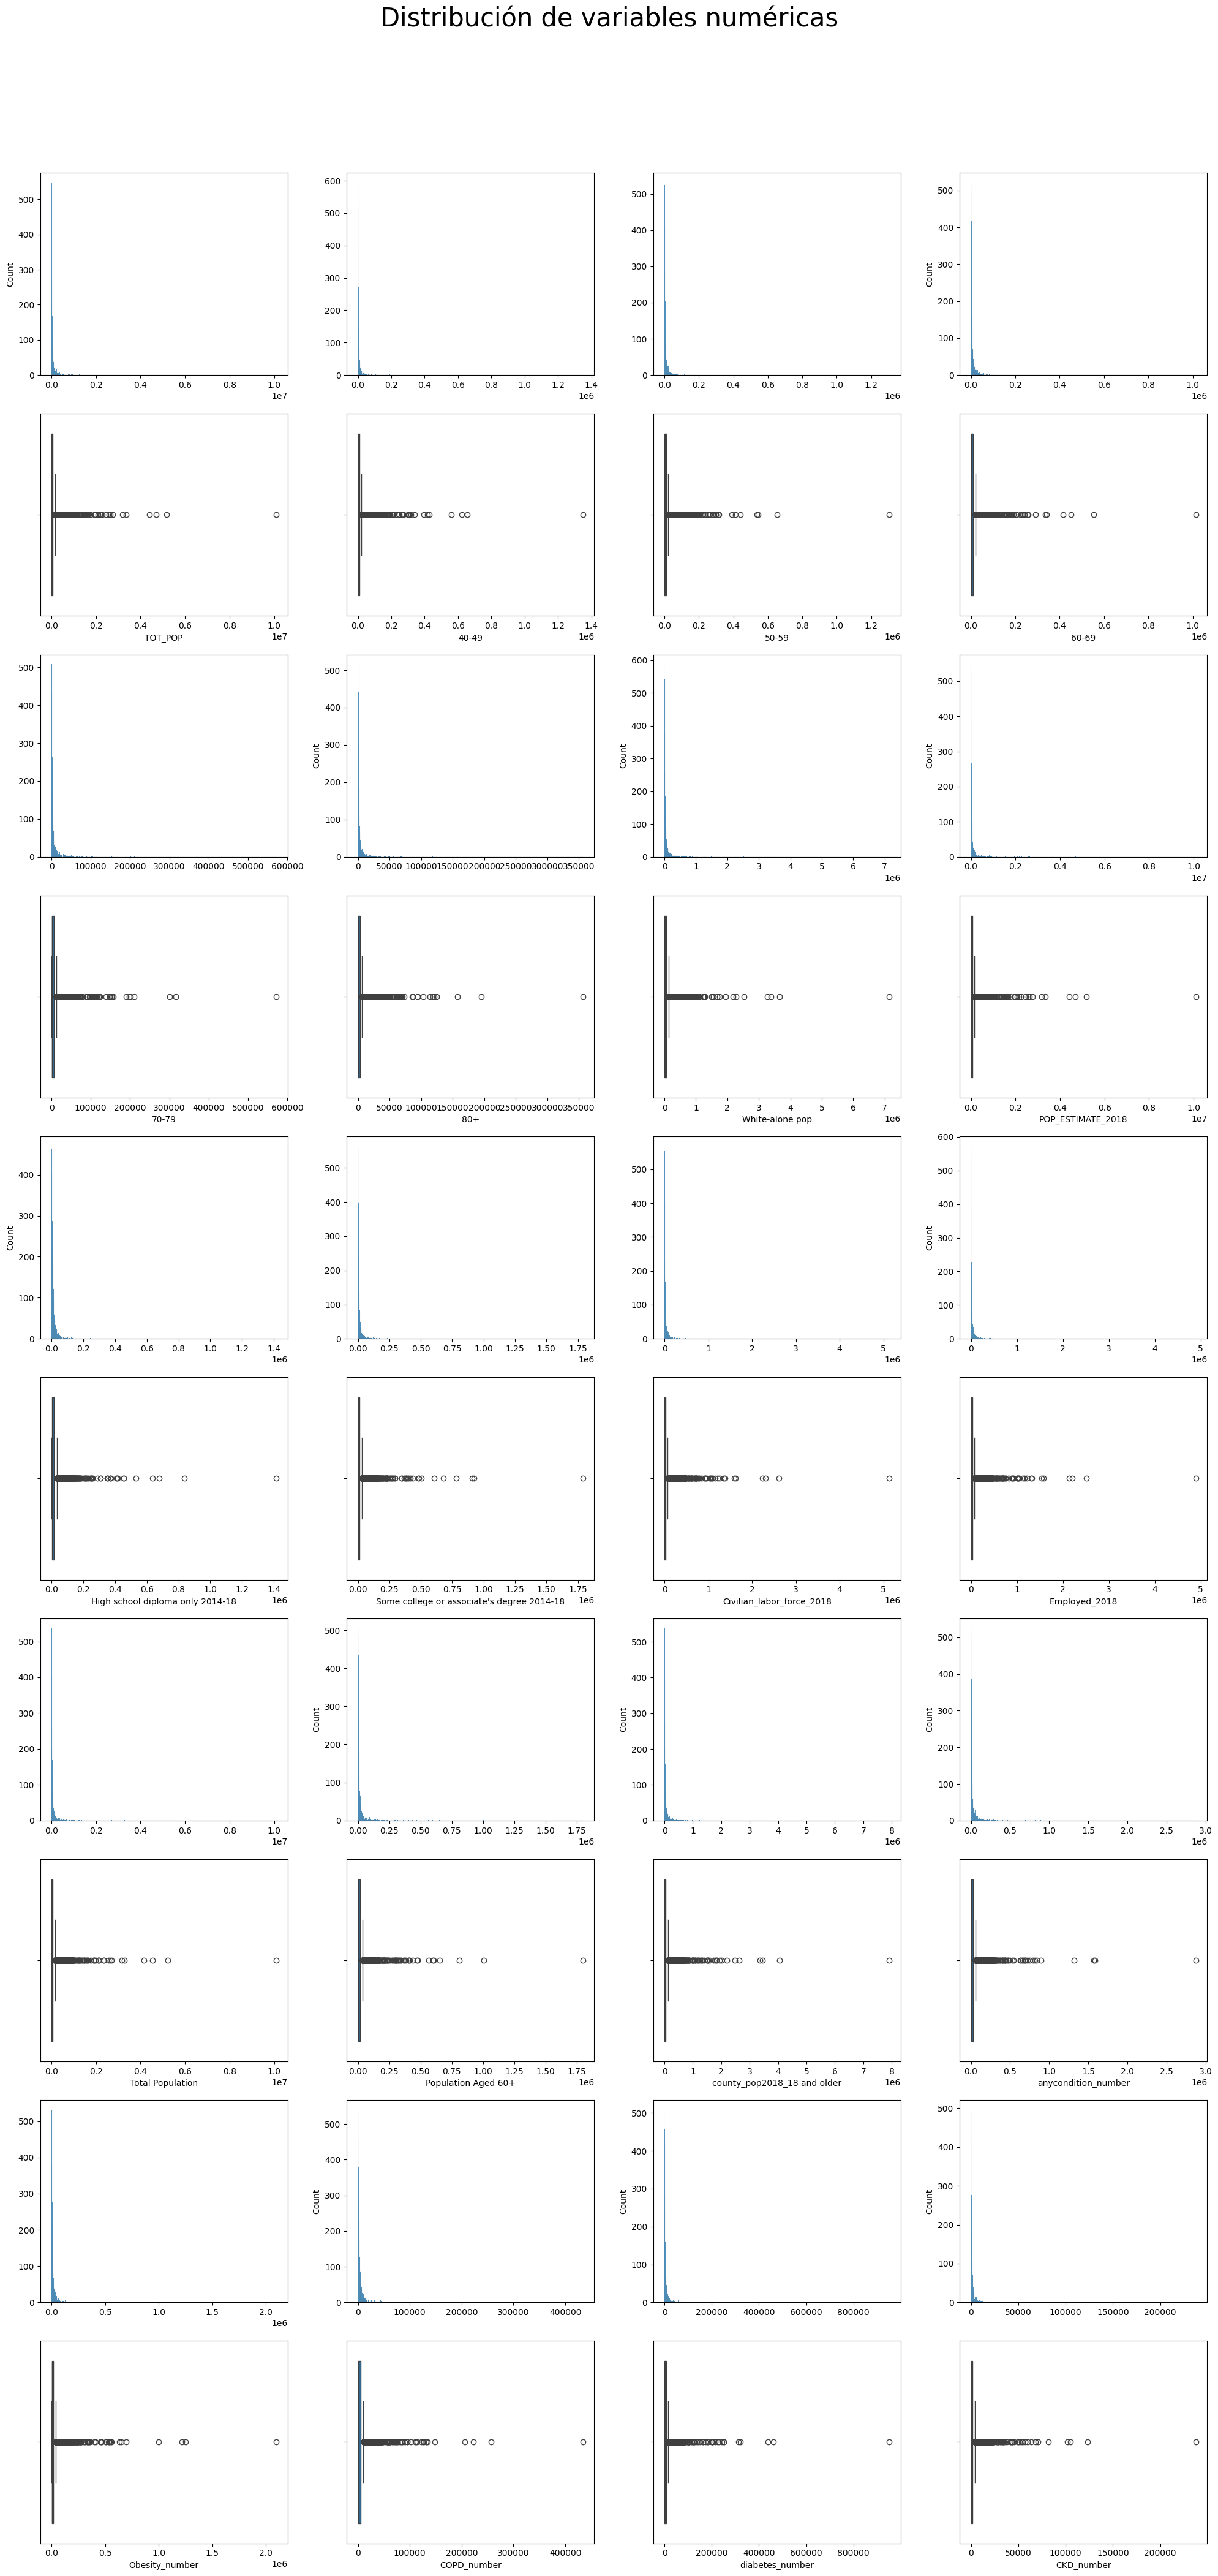

In [14]:
# Creamos la figura para los histogramas y diagramas de caja
fig, axis = plt.subplots(10, 4, figsize=(20,40))

# Título global al conjunto
fig.suptitle("Distribución de variables numéricas", fontsize=30, y=1.05)


# Histogramas y diagramas de caja
sns.histplot(ax=axis[0, 0], data=data, x="TOT_POP").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=data, x="TOT_POP")
sns.histplot(ax=axis[0, 1], data=data, x="40-49").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=data, x="40-49")
sns.histplot(ax=axis[0, 2], data=data, x="50-59").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 2], data=data, x="50-59")
sns.histplot(ax=axis[0, 3], data=data, x="60-69").set(xlabel=None)
sns.boxplot(ax=axis[1, 3], data=data, x="60-69")
sns.histplot(ax=axis[2, 0], data=data, x="70-79").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 0], data=data, x="70-79")
sns.histplot(ax=axis[2, 1], data=data, x="80+").set(xlabel=None)
sns.boxplot(ax=axis[3, 1], data=data, x="80+")
sns.histplot(ax=axis[2, 2], data=data, x="White-alone pop").set(xlabel=None)
sns.boxplot(ax=axis[3, 2], data=data, x="White-alone pop")
sns.histplot(ax=axis[2, 3], data=data, x="POP_ESTIMATE_2018").set(xlabel=None)
sns.boxplot(ax=axis[3, 3], data=data, x="POP_ESTIMATE_2018")
sns.histplot(ax=axis[4, 0], data=data, x="High school diploma only 2014-18").set(xlabel=None)
sns.boxplot(ax=axis[5, 0], data=data, x="High school diploma only 2014-18")
sns.histplot(ax=axis[4, 1], data=data, x="Some college or associate's degree 2014-18").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[5, 1], data=data, x="Some college or associate's degree 2014-18")
sns.histplot(ax=axis[4, 2], data=data, x="Civilian_labor_force_2018").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[5, 2], data=data, x="Civilian_labor_force_2018")
sns.histplot(ax=axis[4, 3], data=data, x="Employed_2018").set(xlabel=None)
sns.boxplot(ax=axis[5, 3], data=data, x="Employed_2018")
sns.histplot(ax=axis[6, 0], data=data, x="Total Population").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[7, 0], data=data, x="Total Population")
sns.histplot(ax=axis[6, 1], data=data, x="Population Aged 60+").set(xlabel=None)
sns.boxplot(ax=axis[7, 1], data=data, x="Population Aged 60+")
sns.histplot(ax=axis[6, 2], data=data, x="county_pop2018_18 and older").set(xlabel=None)
sns.boxplot(ax=axis[7, 2], data=data, x="county_pop2018_18 and older")
sns.histplot(ax=axis[6, 3], data=data, x="anycondition_number").set(xlabel=None)
sns.boxplot(ax=axis[7, 3], data=data, x="anycondition_number")
sns.histplot(ax=axis[8, 0], data=data, x="Obesity_number").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[9, 0], data=data, x="Obesity_number")
sns.histplot(ax=axis[8, 1], data=data, x="COPD_number").set(xlabel=None)
sns.boxplot(ax=axis[9, 1], data=data, x="COPD_number")
sns.histplot(ax=axis[8, 2], data=data, x="diabetes_number").set(xlabel=None)
sns.boxplot(ax=axis[9, 2], data=data, x="diabetes_number")
sns.histplot(ax=axis[8, 3], data=data, x="CKD_number").set(xlabel=None)
sns.boxplot(ax=axis[9, 3], data=data, x="CKD_number")




# Mostrar la gráfica
plt.tight_layout()
plt.show()

## **5 Ingeniería de características**

### **5.1 Análisis de valores atípicos** 

### **5.2 Entrenamiento/prueba división de ambos marcos de datos**

In [15]:
# Separar variables independientes y dependientes
x = data.drop("Heart disease_number", axis = 1)
y = data["Heart disease_number"]

# Dividimos el DataFrame en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Indices de los conjuntos de entrenamiento y prueba
train_indices = list(x_train.index)
test_indices = list(x_test.index)


x_train.head()

,TOT_POP,40-49,50-59,60-69,70-79,80+,White-alone pop,POP_ESTIMATE_2018,High school diploma only 2014-18,Some college or associate's degree 2014-18,Civilian_labor_force_2018,Employed_2018,Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
1292,26625,2831,3831,3860,2460,1208,25313,26625,6396,5727,12456,11696,26317,7218,20545,10213,7930,2314,2823,771
2302,51266,5880,7885,8271,4801,2928,49662,51266,18496,9051,22421,21317,52880,15253,41304,19282,13713,4097,5416,1454
761,37779,4451,5107,4349,2713,1561,35248,37779,10860,7263,16882,16245,37543,8058,30379,14283,10238,2792,3698,871
2194,91984,11444,12774,10791,6736,3478,69216,91984,19984,21265,44792,43309,90098,19479,70506,33057,25735,5716,7913,2118
1241,134487,15845,17982,16909,10074,6039,109628,134487,33106,30526,62865,60219,134327,31227,103686,49754,38882,10002,12987,3490


In [17]:
x_test.head()

,TOT_POP,40-49,50-59,60-69,70-79,80+,White-alone pop,POP_ESTIMATE_2018,High school diploma only 2014-18,Some college or associate's degree 2014-18,Civilian_labor_force_2018,Employed_2018,Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
2893,9038,1213,1266,1114,795,577,6036,9038,2600,1869,4040,3916,8873,2400,7485,3483,2769,734,1107,293
2968,269805,29901,34984,34993,21751,9778,222752,269805,41056,71771,122885,117172,258903,59433,214553,85526,63722,12803,21777,5976
1064,17408,2423,2338,1912,1341,526,15940,17408,5285,3084,4654,4360,17748,3649,13625,8737,5927,2289,2604,594
1231,117327,14215,16816,15057,8452,4096,111316,117327,29465,23472,62239,60206,114145,24717,88955,36873,27220,7975,9428,2639
2987,225685,25417,26368,27837,17317,8274,195016,225685,33282,50020,111670,106375,212738,47353,181775,60192,45626,11009,16961,5054


## **GUARDAMOS**

In [19]:
# Agregar la columna "Heart disease_number" a los conjuntos de datos seleccionados:
x_train["Heart disease_number"] = list(y_train)
x_test["Heart disease_number"] = list(y_test)

# Guardamos
x_train.to_csv("/workspaces/machine-learning-python-template_Regularized_Linear_Reg_ds_13_david/data/processed_train.csv", index = False)
x_test.to_csv("/workspaces/machine-learning-python-template_Regularized_Linear_Reg_ds_13_david/data/processed_test.csv", index = False)

## Regresión lineal regularizada

In [ ]:
#Leer los archivos CSV:
train_data = pd.read_csv("/workspaces/machine-learning-python-template_Regularized_Linear_Reg_ds_13_david/data/processed_train.csv")
test_data = pd.read_csv("/workspaces/machine-learning-python-template_Regularized_Linear_Reg_ds_13_david/data/processed_test.csv")

train_data.head()

,TOT_POP,40-49,50-59,60-69,70-79,80+,White-alone pop,POP_ESTIMATE_2018,High school diploma only 2014-18,Some college or associate's degree 2014-18,Civilian_labor_force_2018,Employed_2018,Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number,Heart disease_number
0,26625,2831,3831,3860,2460,1208,25313,26625,6396,5727,12456,11696,26317,7218,20545,10213,7930,2314,2823,771,2072
1,51266,5880,7885,8271,4801,2928,49662,51266,18496,9051,22421,21317,52880,15253,41304,19282,13713,4097,5416,1454,3796
2,37779,4451,5107,4349,2713,1561,35248,37779,10860,7263,16882,16245,37543,8058,30379,14283,10238,2792,3698,871,2222
3,91984,11444,12774,10791,6736,3478,69216,91984,19984,21265,44792,43309,90098,19479,70506,33057,25735,5716,7913,2118,5484
4,134487,15845,17982,16909,10074,6039,109628,134487,33106,30526,62865,60219,134327,31227,103686,49754,38882,10002,12987,3490,8686
